In [58]:
%pylab inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cPickle as pickle
import gzip
dt = 1/20000 #20kHz sampling rate

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [59]:
# The PN data was recorded on the following days

PNDates = ('03_21','03_22','03_23','03_24','03_29','03_31','04_27','05_02')

In [61]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]

stim_start = 1 #seconds
stim_end   = 5 #seconds

idx_stim_start = int(stim_start/dt)
idx_stim_end =   int(stim_end/dt)

th = 0 # use threshold of 0 mV for AP detection. the AP waveform is not very noise so the below works



### PNs
- Starting pulse +10 pA from holding current with increasing current injections of +10 pA
- Sampling frequency 20 kHz
- Bassel low pass filter 2.9

In [62]:
PNdata = pickle.load(gzip.open('/Users/Sri/Desktop/InjectionVsFiring/Data/PNdata.pklz'))
pulse_labelsPN = pickle.load(gzip.open('/Users/Sri/Desktop/InjectionVsFiring/Data/pulselabelsPN.pklz','rb'))

In [63]:
number_of_datasetsPN = 5

Firing_RatesPN = [[] for x in xrange(number_of_datasetsPN)]

for dataset in range(number_of_datasetsPN):
    number_of_pulses = len(pulse_labelsPN[dataset])
    for i in range(number_of_pulses):
        V = PNdata[dataset][i]
        V_maxima = (local_maxima(V) & (V>th))
        indices = V_maxima.nonzero()[0]
        Firing_RatesPN[dataset].append(int(len(indices))/(stim_end-stim_start))    


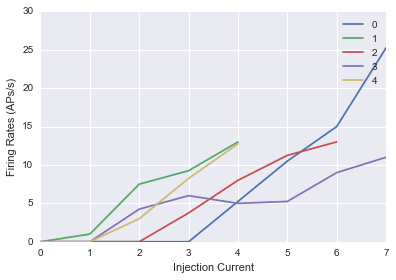

In [64]:
fig = figure()

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel('Firing Rates (APs/s)')
ax.set_xlabel('Injection Current')

for dset in range(number_of_datasetsPN):
    current = numpy.arange(len(Firing_RatesPN[dset]))
    
    ax.plot(current,Firing_RatesPN[dset],label = dset)
ax.legend()

show()


### LNs

- current injections in 50 pA steps
- Sampling frequency 20 kHz
- Bassel low pass filter 2.9

In [65]:
LNdata = pickle.load(gzip.open('/Users/Sri/Desktop/InjectionVsFiring/Data/LNdata.pklz','rb'))
pulse_labelsLN = pickle.load(gzip.open('/Users/Sri/Desktop/InjectionVsFiring/Data/pulselabelsLN.pklz','rb'))

In [66]:
number_of_datasetsLN = 8


Firing_RatesLN = [[] for x in xrange(number_of_datasetsLN)]

for dataset in range(number_of_datasetsLN):
    number_of_pulses = len(pulse_labelsLN[dataset])
    for i in range(number_of_pulses):

        V = LNdata[dataset][i]
        V_maxima = (local_maxima(V) & (V>th))
        indices = V_maxima.nonzero()[0]
        Firing_RatesLN[dataset].append(int(len(indices))/(stim_end-stim_start))  



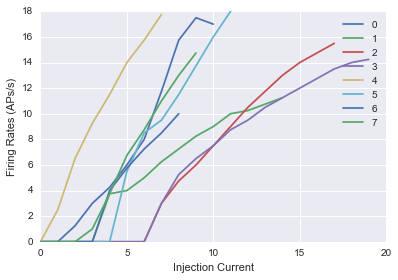

In [67]:
fig = figure()

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel('Firing Rates (APs/s)')
ax.set_xlabel('Injection Current')


for dset in range(number_of_datasetsLN):
    ax.plot(Firing_RatesLN[dset],label = dset)
    
ax.legend()
show()